<a href="https://colab.research.google.com/github/feud72/hands_on_ml/blob/master/9%EC%9E%A5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise = 0.1, random_state=42)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text

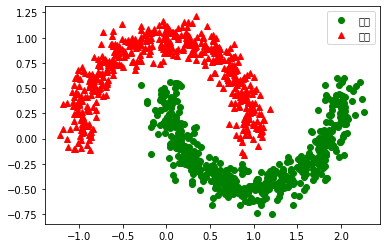

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="양성")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], "r^", label="음성")
plt.legend()
plt.show()

In [0]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]

In [9]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [0]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [11]:
y_moons.shape, y_moons_column_vector.shape

((1000,), (1000, 1))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons_with_bias, y_moons_column_vector, test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800, 1), (200, 1))

In [0]:
def random_batch(X_train, y_train, batch_size):
  rnd_indices = np.random.randint(0, len(X_train), batch_size)
  X_batch = X_train[rnd_indices]
  y_batch = y_train[rnd_indices]
  return X_batch, y_batch

In [0]:
X_batch, y_batch = random_batch(X_train, y_train, 5)

In [20]:
X_batch, y_batch

(array([[ 1.        ,  1.44883647, -0.65359952],
        [ 1.        ,  2.02377396,  0.02182621],
        [ 1.        ,  1.23051614, -0.45962325],
        [ 1.        ,  0.31882596,  0.96736613],
        [ 1.        ,  1.08107875, -0.47427965]]), array([[1],
        [1],
        [1],
        [0],
        [1]]))

In [23]:
import tensorflow as tf

def reset_graph(seed=42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)

reset_graph()

In [25]:
n_inputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)

loss = tf.losses.log_loss(y, y_proba)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init = tf.global_variables_initializer()

In [27]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(n_epochs):
    for batch_index in range(n_batches):
      X_batch, y_batch = random_batch(X_train, y_train, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    loss_val = loss.eval({X: X_test, y: y_test})
    if epoch % 100 == 0:
      print("Epoch:", epoch, "\tLoss:", loss_val)

  y_proba_val = y_proba.eval(feed_dict={X: X_test, y:  y_test})

Epoch: 0 	Loss: 0.809017
Epoch: 100 	Loss: 0.32705453
Epoch: 200 	Loss: 0.29274043
Epoch: 300 	Loss: 0.2787211
Epoch: 400 	Loss: 0.27165082
Epoch: 500 	Loss: 0.2675825
Epoch: 600 	Loss: 0.26515624
Epoch: 700 	Loss: 0.26362565
Epoch: 800 	Loss: 0.26270038
Epoch: 900 	Loss: 0.26222897


In [31]:
y_proba_val[:5]

array([[0.9877119 ],
       [0.07142392],
       [0.9551767 ],
       [0.27700752],
       [0.5299719 ]], dtype=float32)

In [32]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [ True]])

In [33]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.8762886597938144

In [34]:
recall_score(y_test, y_pred)

0.85

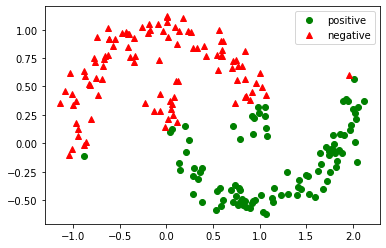

In [35]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="negative")

plt.legend()
plt.show()